<a href="https://colab.research.google.com/drive/1Ejalzwa1OUUPk2PNGixdoskEUKi3aQhx?usp=sharing" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/>
</a>

In [1]:
#Install libraries needed for finetuning
!pip install -q unsloth "torch>=2.1" transformers accelerate peft datasets bitsandbytes
!pip install -q trl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.2/193.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#2 Import Huggingface and WandB
from huggingface_hub import login
login("your key")

import wandb
wandb.login(key="your key")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: pomacoc217 (pomacoc217-college) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [3]:
#3 Load Qwen1.5-0.5B-Chat with Unsloth
from unsloth import FastLanguageModel
import torch

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "Qwen/Qwen1.5-0.5B-Chat",
    max_seq_length=2048,
    dtype=None,
    load_in_4bit=True,
)

tokenizer.pad_token = tokenizer.eos_token

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.4.1: Fast Qwen2 patching. Transformers: 4.48.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

In [4]:
#4 Load sentiment classification dataset
from datasets import load_dataset

dataset = load_dataset("financial_phrasebank", "sentences_allagree", split="train")

# Check a sample
print(dataset[0])

README.md:   0%|          | 0.00/8.88k [00:00<?, ?B/s]

financial_phrasebank.py:   0%|          | 0.00/6.04k [00:00<?, ?B/s]

The repository for financial_phrasebank contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/financial_phrasebank.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


FinancialPhraseBank-v1.0.zip:   0%|          | 0.00/682k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2264 [00:00<?, ? examples/s]

{'sentence': 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .', 'label': 1}


In [5]:
# Explore dataset structure
import pandas as pd

df = pd.DataFrame(dataset)
print(df.head())

# Label distribution
print(df['label'].value_counts())

                                            sentence  label
0  According to Gran , the company has no plans t...      1
1  For the last quarter of 2010 , Componenta 's n...      2
2  In the third quarter of 2010 , net sales incre...      2
3  Operating profit rose to EUR 13.1 mn from EUR ...      2
4  Operating profit totalled EUR 21.1 mn , up fro...      2
label
1    1391
2     570
0     303
Name: count, dtype: int64


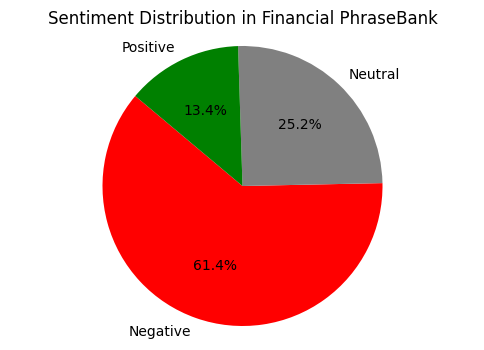

In [6]:
# Visualize class distribution
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()
labels = ['Negative', 'Neutral', 'Positive']

plt.figure(figsize=(6, 4))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=["red", "grey", "green"])
plt.title("Sentiment Distribution in Financial PhraseBank")
plt.axis('equal')
plt.show()

In [7]:
#5 Format into instruction style (Alpaca/OpenChat format)
label_map = {
    0: "Negative",
    1: "Neutral",
    2: "Positive"
}

def format_prompt(example):
    return {
        "text": f"""Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Determine the sentiment of the following text. Respond with 'Positive', 'Negative', or 'Neutral'.

### Input:
{example['sentence']}

### Response:
{label_map[example['label']]}"""
    }

dataset = dataset.map(format_prompt, batched=False)

Map:   0%|          | 0/2264 [00:00<?, ? examples/s]

In [8]:
#6 Tokenize formatted prompts
def tokenize(example):
    tokens = tokenizer(
        example["text"],
        padding="max_length",
        truncation=True,
        max_length=512,
    )
    tokens["labels"] = tokens["input_ids"].copy()
    return tokens

tokenized_dataset = dataset.map(tokenize, remove_columns=dataset.column_names)

Map:   0%|          | 0/2264 [00:00<?, ? examples/s]

In [9]:
#7 Prepare model with LoRA (Low Rank Adaptation)
FastLanguageModel.for_training(model, use_gradient_checkpointing=True)
model = FastLanguageModel.get_peft_model(model)


Unsloth 2025.4.1 patched 24 layers with 24 QKV layers, 24 O layers and 24 MLP layers.


In [10]:
#8 Setup TrainingArguments for Huggingface Trainer
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./qwen_sentiment_lora",
    per_device_train_batch_size=4,
    gradient_accumulation_steps=2,
    learning_rate=2e-4,
    num_train_epochs=3,
    logging_steps=10,
    save_strategy="epoch",
    fp16=True,
    remove_unused_columns=False,
)


In [11]:
#9 Setup Huggingface Trainer
from transformers import Trainer, DataCollatorForLanguageModeling

trainer = Trainer(
    model=model,
    train_dataset=tokenized_dataset,
    args=training_args,
    data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False),
)

In [12]:
#10 Start LoRA Fine-tuning
trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 2,264 | Num Epochs = 3 | Total steps = 849
O^O/ \_/ \    Batch size per device = 4 | Gradient accumulation steps = 2
\        /    Data Parallel GPUs = 1 | Total batch size (4 x 2 x 1) = 8
 "-____-"     Trainable parameters = 7,569,408/5,000,000,000 (0.15% trained)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
10,5.314600
20,2.371600
30,1.492900
40,1.266300
50,1.154500
60,1.102200
70,1.178500
80,1.125700
90,1.205700
100,1.095200


TrainOutput(global_step=849, training_loss=0.9999144529425775, metrics={'train_runtime': 732.5999, 'train_samples_per_second': 9.271, 'train_steps_per_second': 1.159, 'total_flos': 6592818780831744.0, 'train_loss': 0.9999144529425775, 'epoch': 3.0})

In [13]:
#11 Save LoRA adapters and tokenizer
model.save_pretrained("qwen_sentiment_lora_adapter")
tokenizer.save_pretrained("qwen_sentiment_lora_adapter")

('qwen_sentiment_lora_adapter/tokenizer_config.json',
 'qwen_sentiment_lora_adapter/special_tokens_map.json',
 'qwen_sentiment_lora_adapter/vocab.json',
 'qwen_sentiment_lora_adapter/merges.txt',
 'qwen_sentiment_lora_adapter/added_tokens.json',
 'qwen_sentiment_lora_adapter/tokenizer.json')

In [15]:
#examples
prompt = """Review: The customer service team was very responsive and helpful.
Sentiment: Positive

Review: The product quality was okay but not exceptional.
Sentiment: Neutral

Review: I waited over an hour for support and still received no help.
Sentiment: Negative

Review: The user interface is clean, intuitive, and easy to navigate.
Sentiment: Positive

Review: Delivery time was acceptable but the packaging was damaged.
Sentiment: Neutral

Review: The software crashed multiple times and caused data loss.
Sentiment:"""

inputs = tokenizer(prompt, return_tensors="pt").to("cuda")

with torch.no_grad():
    output = model.generate(
        **inputs,
        max_new_tokens=5,
        temperature=0.7,
        top_p=0.9,
        do_sample=True,
        eos_token_id=tokenizer.eos_token_id
    )

decoded_output = tokenizer.decode(output[0], skip_special_tokens=True)
print(decoded_output)

Review: The customer service team was very responsive and helpful.
Sentiment: Positive

Review: The product quality was okay but not exceptional.
Sentiment: Neutral

Review: I waited over an hour for support and still received no help.
Sentiment: Negative

Review: The user interface is clean, intuitive, and easy to navigate.
Sentiment: Positive

Review: Delivery time was acceptable but the packaging was damaged.
Sentiment: Neutral

Review: The software crashed multiple times and caused data loss.
Sentiment: Negative
